## Monte Carlo Simulations - Pi Value Estimation

In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd
from numpy.random import normal

%matplotlib inline

C:\Users\wodnj\AppData\Local\Temp\ipykernel_13792\1152215232.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 100 number of points with unit circle
n_points = 100
df = pd.DataFrame(np.random.rand(n_points, 2), columns=['x', 'y'])
df.head(10)

,x,y
0,0.800771,0.845511
1,0.629159,0.789267
2,0.929186,0.267421
3,0.627372,0.564893
4,0.937806,0.538257
5,0.768788,0.112778
6,0.914570,0.815300
7,0.553688,0.390474
8,0.148761,0.648312
9,0.538656,0.205410


In [3]:
def within_unit_circle(row):
    x, y = row['x'], row['y']
    return math.sqrt(x ** 2.0 + y ** 2.0) <= 1.0

In [4]:
df['within_unit_circle'] = df.apply(within_unit_circle, axis = 1)
print (df[:10])

          x         y  within_unit_circle
0  0.800771  0.845511               False
1  0.629159  0.789267               False
2  0.929186  0.267421                True
3  0.627372  0.564893                True
4  0.937806  0.538257               False
5  0.768788  0.112778                True
6  0.914570  0.815300               False
7  0.553688  0.390474                True
8  0.148761  0.648312                True
9  0.538656  0.205410                True


In [5]:
# boolean values / True = 1, False = 0.
boolean_frame = pd.DataFrame({
    's1': [True, True, True],
    's2': [False, False, False],
    's3': [True, False, True],
})

print (boolean_frame['s1'].sum())
print (boolean_frame['s2'].sum())
print (boolean_frame['s3'].sum())


3
0
2


In [6]:
df['within_unit_circle'].head()

0    False
1    False
2     True
3     True
4    False
Name: within_unit_circle, dtype: bool

In [7]:
print (df['within_unit_circle'].sum())

76


In [8]:
almost_pi = df['within_unit_circle'].sum() / len(df) * 4.0

print (almost_pi)
print (math.pi)
print (abs(almost_pi - math.pi))

3.04
3.141592653589793
0.10159265358979308


(0.0, 1.0, 0.0, 1.0)

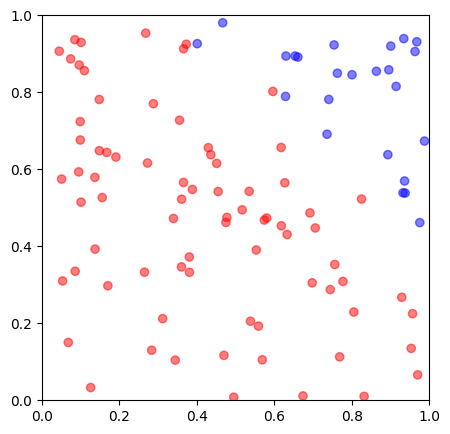

In [9]:
plt.scatter(df['x'], df['y'], c = [within and 'red' or 'blue' for within in df['within_unit_circle']], alpha = 0.5)
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
ax = plt.gca()
ax.axis([0.0, 1.0, 0.0, 1.0])

In [10]:
# 10000 number of points with any circle
n_points = 10000
df = pd.DataFrame(np.random.uniform(0 , 2, size = (n_points, 2)), columns=['x', 'y'])
df.head(10)

,x,y
0,1.176701,1.984503
1,1.829236,0.482238
2,0.679606,1.463002
3,0.852565,1.003434
4,1.260883,0.915539
5,0.371732,0.667268
6,1.711582,0.014858
7,1.496426,0.047477
8,0.054107,0.819009
9,1.663639,1.739877


In [11]:
def within_any_circle(row):
    x, y = row['x'], row['y']
    return math.sqrt(x ** 2.0 + y ** 2.0) <= 2

In [12]:
df['within_any_circle'] = df.apply(within_any_circle, axis = 1)
print (df[:10])

          x         y  within_any_circle
0  1.176701  1.984503              False
1  1.829236  0.482238               True
2  0.679606  1.463002               True
3  0.852565  1.003434               True
4  1.260883  0.915539               True
5  0.371732  0.667268               True
6  1.711582  0.014858               True
7  1.496426  0.047477               True
8  0.054107  0.819009               True
9  1.663639  1.739877              False


In [13]:
df['within_any_circle'].head()

0    False
1     True
2     True
3     True
4     True
Name: within_any_circle, dtype: bool

In [14]:
almost_pi = df['within_any_circle'].sum() / len(df) * 4.0

print (almost_pi)
print (math.pi)
print (abs(almost_pi - math.pi))

3.1344
3.141592653589793
0.007192653589793263


(0.0, 2.0, 0.0, 2.0)

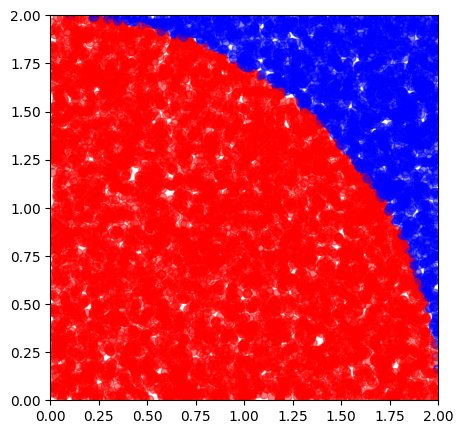

In [15]:
plt.scatter(df['x'], df['y'], c = [within and 'red' or 'blue' for within in df['within_any_circle']], alpha = 0.5)
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
ax = plt.gca()
ax.axis([0.0, 2.0, 0.0, 2.0])